In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1c72LrjJD7IZbvYYILUyVQRITxBkFEBo_'}) # replace the id with id of file you want to access
downloaded.GetContentFile('datasets_228_482_diabetes.csv') 

In [0]:
import pandas as pd
xyz = pd.read_csv('datasets_228_482_diabetes.csv') 

In [5]:
xyz.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
xyz.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
xyz.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
xyz[["Pregnancies","Outcome"]].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


In [0]:
import pandas as pd
def preg(cols):
  pregnancies=cols[0]
  if(pregnancies==17 or pregnancies==15 or pregnancies==14):
    return 0;
  elif(pregnancies==9 or pregnancies==11):
    return 1;
  elif(pregnancies==8 or pregnancies==7):
    return 2;
  elif(pregnancies==13):
    return 3;
  elif(pregnancies==12 or pregnancies==10):
    return 4;
  elif(pregnancies==5 or pregnancies==3 or pregnancies==0 or pregnancies==4 or pregnancies==6):
    return 5;
  else:
    return 6;

xyz['Pregnancies']=xyz[['Pregnancies']].apply(preg,axis=1);

In [10]:
xyz.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,148,72,35,0,33.6,0.627,50,1
1,6,85,66,29,0,26.6,0.351,31,0
2,2,183,64,0,0,23.3,0.672,32,1
3,6,89,66,23,94,28.1,0.167,21,0
4,5,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


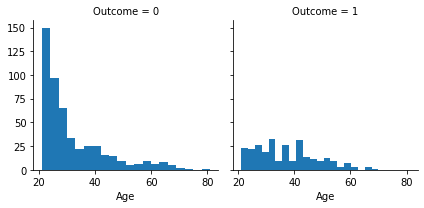

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(xyz,col='Outcome')
g.map(plt.hist,'Age',bins=20)

In [0]:
# xyz['Age']=pd.cut(xyz['Age'],10)
# xyz[['Age','Outcome']].groupby(['Age'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

In [13]:
import numpy as np
xyz = xyz.copy(deep = True)
xyz[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = xyz[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

xyz.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [0]:
xyz['Glucose'].fillna(xyz['Glucose'].mean(),inplace=True)
xyz['BloodPressure'].fillna(xyz['BloodPressure'].mean(),inplace=True)
xyz['SkinThickness'].fillna(xyz['SkinThickness'].median(),inplace=True)
xyz['Insulin'].fillna(xyz['Insulin'].median(),inplace=True)
xyz['BMI'].fillna(xyz['BMI'].median(),inplace=True)

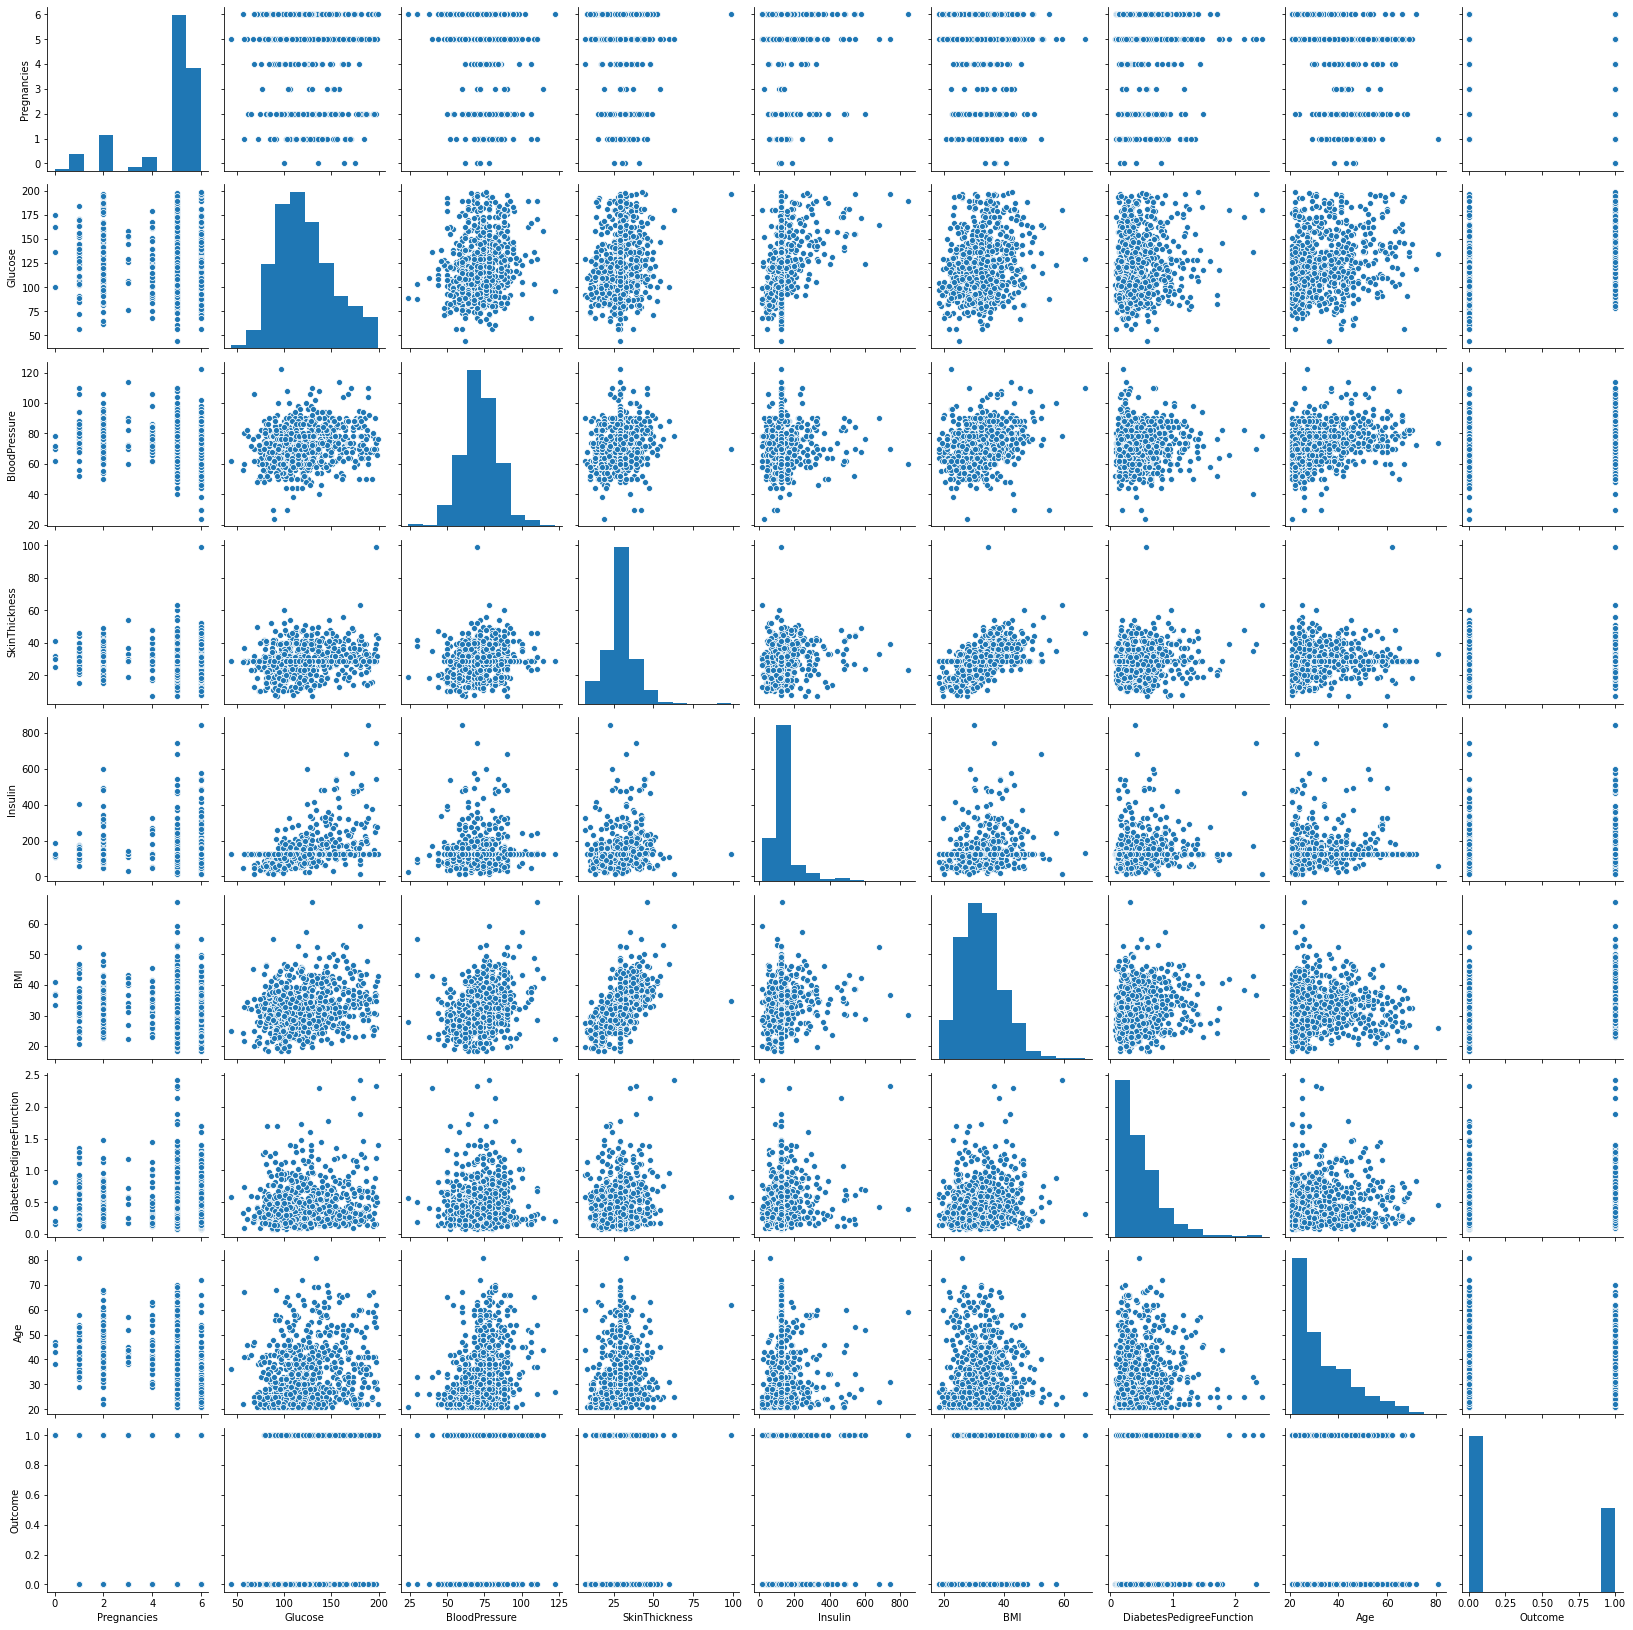

In [15]:
import seaborn as sns
sns.pairplot(xyz)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6324d1ea20>,
      dtype=object)

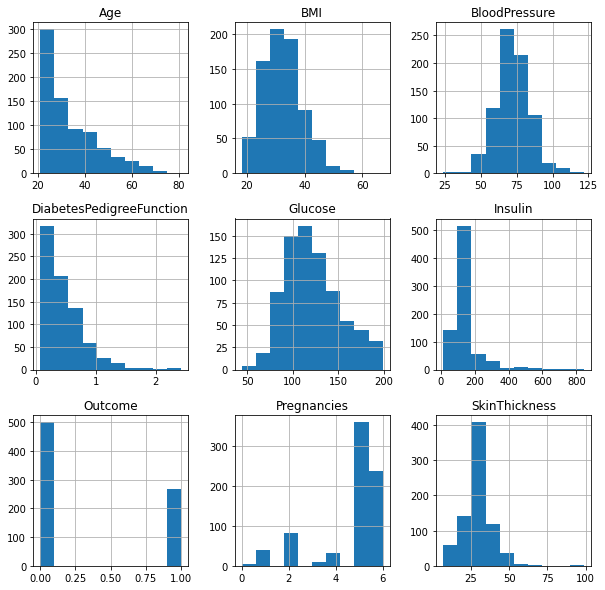

In [16]:
xyz.hist(figsize=(10,10))

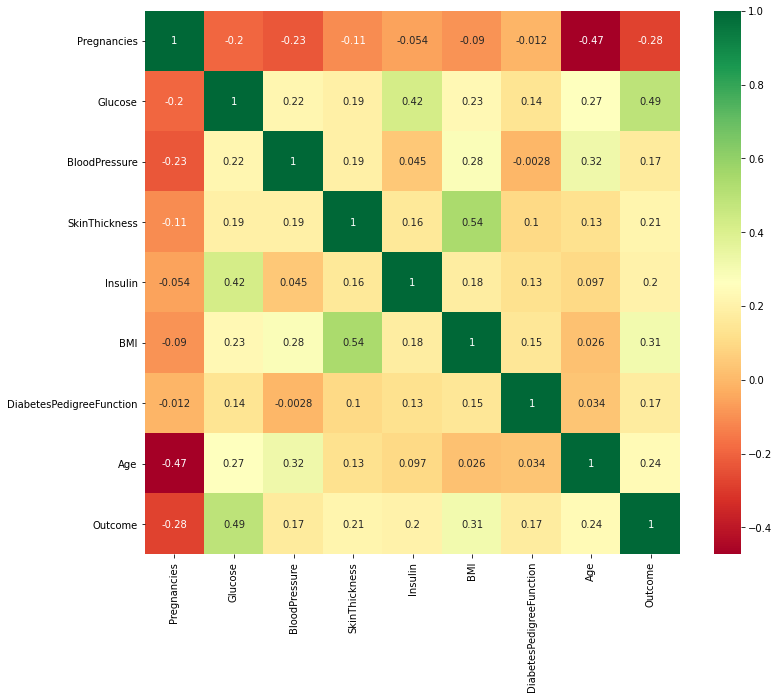

In [17]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(xyz.corr(), annot=True,cmap ='RdYlGn') 

In [0]:
x_train = xyz.drop('Outcome', 1)
y_train = xyz['Outcome']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)

X_standardized=scaler.transform(x_train)
x_train_final = pd.DataFrame(X_standardized)
x_train_final.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,6.649773e-18,-3.301757e-16,6.966722e-16,-1.795800e-16,4.416317e-17,2.815312e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.144164e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,2.096109e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,2.096109e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,8.803658e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,8.803658e-01,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [0]:
from sklearn.model_selection import train_test_split
x_train_data,x_test,y_train_data,y_test=train_test_split(x_train_final,y_train,test_size=0.33,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

logreg=LinearRegression()
logreg.fit(x_train_data,y_train_data)
y_pred=logreg.predict(x_test)
acc_log=round(logreg.score(x_train_data,y_train_data)*100,2)
print(acc_log)

35.62


In [22]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [23]:
from keras.layers import Dropout
seed=6
np.random.seed(seed)

def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, input_dim = 16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model


learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.2, 0.4,0.6]

model=KerasClassifier(build_fn=create_model,epochs=5,batch_size=32,verbose=0)

param_grid=dict(learn_rate=learn_rate,dropout_rate=dropout_rate)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(random_state=seed),verbose=10)
grid_results=grid.fit(x_train_final,y_train)
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means=grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.649, total=   1.5s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.662, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.630, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.745, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.771, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.727, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.5s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.701, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.3s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.766, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.824, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.9s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.765, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.721, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.669, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.766, total=   1.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.810, total=   0.8s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.752, total=   0.8s
[CV] dropout_rate=0.2, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.2, learn_rate=0.001, score=0.766, total=   1.1s
[CV] dropout_rate=0.2, learn_rate=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


Best: 0.7579068064689636, using {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.6915796637535095 (0.05595843844549141) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7566081047058105 (0.04136757596672755) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7435871362686157 (0.047239654371049204) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.6914438486099244 (0.054128314502507505) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7579068064689636 (0.03605659760282922) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7578728437423706 (0.04422628986435658) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}
0.6550802111625671 (0.05957181149378039) with: {'dropout_rate': 0.4, 'learn_rate': 0.001}
0.7527119874954223 (0.05102297517322852) with: {'dropout_rate': 0.4, 'learn_rate': 0.01}
0.6511586427688598 (0.05244526932680711) with: {'dropout_rate': 0.4, 'learn_rate': 0.1}
0.6511586427688598 (0.05244526932680711) with: {'dropout_rate': 0.6, 'learn_rate': 0.001}
0.7123249411582947 (0.09759622956

In [0]:
def create_model(activation,init):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer=init, activation=activation))
    model.add(Dense(16, input_dim = 8, kernel_initializer=init, activation=activation))
    model.add(Dense(8, input_dim = 16, kernel_initializer=init, activation=activation))
    model.add(Dense(1, activation=activation))

    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

model=KerasClassifier(build_fn=create_model,epochs=10,batch_size=16)

activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
param_grid=dict(activation=activation,init=init)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(random_state=seed), verbose = 10)
grid_results=grid.fit(x_train_final,y_train)


print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [0]:
from sklearn.model_selection import train_test_split

model=Sequential()
model.add(Dense(16,input_dim=8,kernel_initializer='uniform',activation='tanh'))
model.add(Dense(16,input_dim=16,kernel_initializer='uniform',activation='tanh'))
model.add(Dense(8, input_dim = 16, kernel_initializer= 'uniform', activation= 'tanh'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(x_train_final,y_train, test_size=0.20, random_state=0)
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=10,
                    batch_size=16,
                    verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 323us/step - loss: 0.5430 - accuracy: 0.7231 - val_loss: 0.4322 - val_accuracy: 0.7987
Epoch 2/10
614/614 [==============================] - 0s 105us/step - loss: 0.5052 - accuracy: 0.7622 - val_loss: 0.4302 - val_accuracy: 0.8052
Epoch 3/10
614/614 [==============================] - 0s 87us/step - loss: 0.4950 - accuracy: 0.7622 - val_loss: 0.4419 - val_accuracy: 0.8117
Epoch 4/10
614/614 [==============================] - 0s 89us/step - loss: 0.4949 - accuracy: 0.7655 - val_loss: 0.4232 - val_accuracy: 0.7987
Epoch 5/10
614/614 [==============================] - 0s 95us/step - loss: 0.4908 - accuracy: 0.7638 - val_loss: 0.4177 - val_accuracy: 0.8052
Epoch 6/10
614/614 [==============================] - 0s 98us/step - loss: 0.4879 - accuracy: 0.7573 - val_loss: 0.4031 - val_accuracy: 0.8117
Epoch 7/10
614/614 [==============================] - 0s 90us/step - loss: 0.4871 - accuracy: 

In [29]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.519%


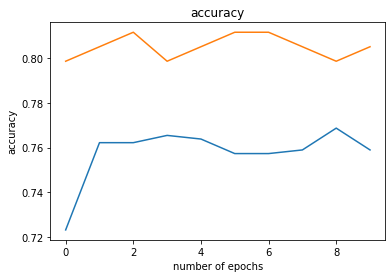

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.show()

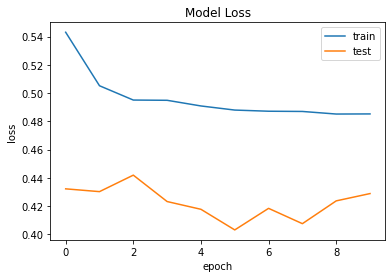

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [38]:
from sklearn.metrics import classification_report
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])
report=classification_report(y_test, y_final, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       107
           1       0.65      0.79      0.71        47

    accuracy                           0.81       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.81      0.81       154



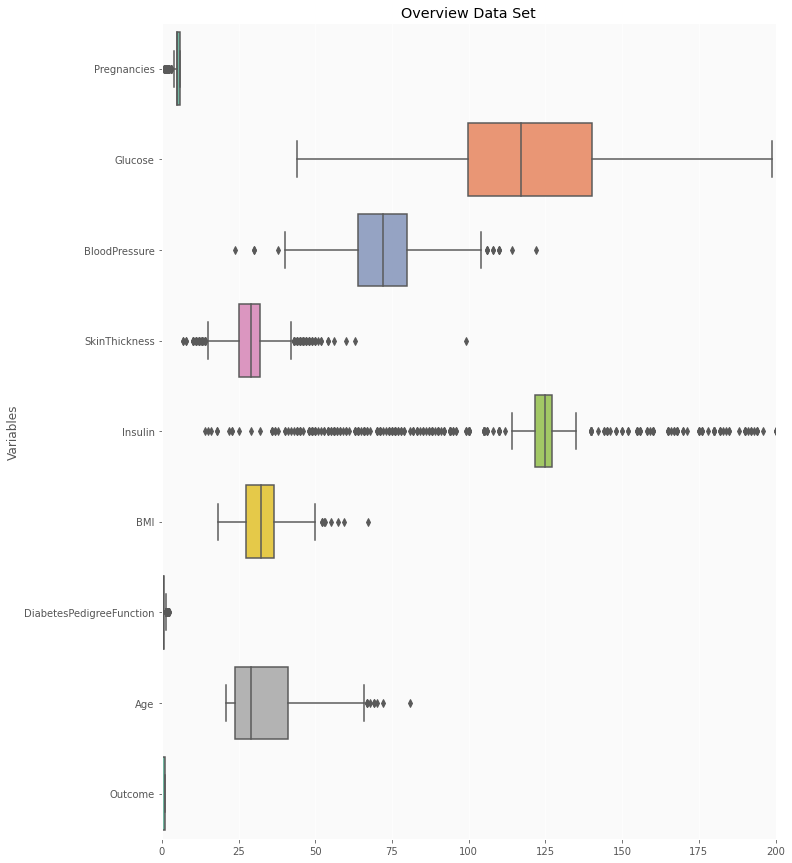

In [42]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = xyz, 
  orient = 'h', 
  palette = 'Set2')